In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr,kendalltau,spearmanr

In [2]:
df = pd.read_csv("C:\\Users\\akhil\\Downloads\\MICROSOFT.csv", date_parser = True)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9082,2022-03-24,299.140015,304.200012,298.320007,304.100006,304.100006,24484500
9083,2022-03-25,305.230011,305.500000,299.290009,303.679993,303.679993,22550600
9084,2022-03-28,304.329987,310.799988,304.329987,310.700012,310.700012,29578200
9085,2022-03-29,313.910004,315.820007,309.049988,315.410004,315.410004,30376600
9086,2022-03-29,313.910004,315.820007,309.049988,315.410004,315.410004,30393403


In [3]:
df[['Volume','High','Open','Low','Close','Adj Close']]=df[['Volume','High','Open','Low','Close','Adj Close']].replace(0.0,df[['Volume','High','Open','Low','Close','Adj Close']].mean())


In [4]:
data_training = df[df['Date']<'2014-06-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...,...
7109,2014-05-23,40.369999,40.369999,40.000000,40.119999,34.832684,18020000
7110,2014-05-27,40.259998,40.259998,39.810001,40.189999,34.893452,26160600
7111,2014-05-28,40.139999,40.189999,39.820000,40.009998,34.737186,25711500
7112,2014-05-29,40.150002,40.349998,39.910000,40.340000,35.023701,19888200


In [5]:
data_testing = df[df['Date']>'2014-06-01'].copy()
data_testing

,Date,Open,High,Low,Close,Adj Close,Volume
7114,2014-06-02,40.950001,41.090000,40.680000,40.790001,35.414391,18504300
7115,2014-06-03,40.599998,40.680000,40.250000,40.290001,34.980301,18068900
7116,2014-06-04,40.209999,40.369999,39.860001,40.320000,35.006317,23209000
7117,2014-06-05,40.590000,41.250000,40.400002,41.209999,35.779034,31865200
7118,2014-06-06,41.480000,41.660000,41.240002,41.480000,36.013454,24060500
...,...,...,...,...,...,...,...
9082,2022-03-24,299.140015,304.200012,298.320007,304.100006,304.100006,24484500
9083,2022-03-25,305.230011,305.500000,299.290009,303.679993,303.679993,22550600
9084,2022-03-28,304.329987,310.799988,304.329987,310.700012,310.700012,29578200
9085,2022-03-29,313.910004,315.820007,309.049988,315.410004,315.410004,30376600


In [6]:
training_data = data_training.drop(['Date','Volume'], axis=1)
training_data.head()

,Open,High,Low,Close,Adj Close
0,0.088542,0.101563,0.088542,0.097222,0.061434
1,0.097222,0.102431,0.097222,0.100694,0.063628
2,0.100694,0.103299,0.100694,0.102431,0.064725
3,0.102431,0.103299,0.098958,0.099826,0.063079
4,0.099826,0.100694,0.097222,0.098090,0.061982


In [7]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.00000000e+00, 1.59477631e-04, 0.00000000e+00, 1.16760393e-04,
        1.16763913e-04],
       [1.46407802e-04, 1.73974079e-04, 1.48442149e-04, 1.75140589e-04,
        1.75145870e-04],
       [2.04970923e-04, 1.88470527e-04, 2.07819009e-04, 2.04347502e-04,
        2.04336848e-04],
       ...,
       [6.75558270e-01, 6.69675531e-01, 6.79472698e-01, 6.71233034e-01,
        9.22832465e-01],
       [6.75726993e-01, 6.72347671e-01, 6.81011845e-01, 6.76781876e-01,
        9.30456579e-01],
       [6.80787154e-01, 6.82702327e-01, 6.86826399e-01, 6.86870603e-01,
        9.44318063e-01]])

In [8]:
x_train = []
y_train = []

In [9]:
training_data.shape[0]

7114

In [10]:
for i in range(50, training_data.shape[0]):
    x_train.append(training_data[i-50:i,1:])
    y_train.append(training_data[i,0])

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train.shape, y_train.shape

((7064, 50, 4), (7064,))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_data,test_data,train_labels,test_labels = train_test_split(x_train,y_train,test_size=0.2)

In [15]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(5651, 50, 4)
(1413, 50, 4)
(5651,)
(1413,)


In [16]:
import tensorflow as tf

In [17]:
final_train_labels = tf.reshape(train_labels,(train_data.shape[0],1))
final_test_lables = tf.reshape(test_labels,(test_data.shape[0],1))

In [18]:
print(final_train_labels.shape)
print(final_test_lables.shape)

(5651, 1)
(1413, 1)


In [19]:
print(type(final_test_lables))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [20]:
train_buffer_size=len(train_data)
batch_size=len(train_data)
final_train_data=tf.data.Dataset.from_tensor_slices((train_data,final_train_labels)).shuffle(buffer_size=train_buffer_size)
final_train_data=final_train_data.batch(batch_size,drop_remainder=True)

In [21]:
final_train_data,final_train_labels = next(iter(final_train_data))

In [22]:
final_train_data.shape

TensorShape([5651, 50, 4])

In [23]:
final_train_labels.shape

TensorShape([5651, 1])

In [24]:
test_buffer_size=len(test_labels)
test_batch_size=len(test_labels)
final_test_data=tf.data.Dataset.from_tensor_slices((test_data,final_test_lables)).shuffle(buffer_size=test_buffer_size)
final_test_data=final_test_data.batch(test_batch_size,drop_remainder=True)

In [25]:
final_test_data,final_test_labels = next(iter(final_test_data))

In [26]:
final_test_data.shape[0]

1413

In [27]:
final_test_data.shape

TensorShape([1413, 50, 4])

In [28]:
final_test_labels.shape

TensorShape([1413, 1])

### Building an RNN 

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,Dropout
from tensorflow.keras.regularizers import l2

In [162]:
reg = Sequential() 

reg.add(GRU(units = 80, activation = 'relu' ,return_sequences = True, input_shape = (x_train.shape[1],4), kernel_regularizer = l2(0.01)))
reg.add(Dropout(rate = 0.2))

reg.add(GRU(units = 70,activation = 'relu',  return_sequences = True, kernel_regularizer = l2(0.01)))
reg.add(Dropout(0.2))

reg.add(GRU(units = 70,activation = 'relu',  return_sequences = True))
reg.add(Dropout(rate = 0.3))

reg.add(GRU(units = 80,activation = 'relu',  return_sequences = True))
reg.add(Dropout(rate = 0.3))

reg.add(GRU(units = 90,activation = 'relu',  return_sequences = False))
reg.add(Dropout(rate = 0.4))

reg.add(Dense(units = 1, activation = 'relu'))


In [163]:
x_train.shape[1]

50

In [164]:
reg.compile(optimizer = 'adagrad', loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError(),
                                                                        tf.keras.metrics.MeanAbsoluteError(),])

In [165]:
epochs = 24

In [166]:
histroy= reg.fit(final_train_data,final_train_labels,validation_data=(final_test_data,final_test_labels), epochs = epochs, batch_size=16)

Epoch 1/24
354/354 [==============================] - 85s 175ms/step - loss: 1.2955 - root_mean_squared_error: 0.2822 - mean_absolute_error: 0.2413 - val_loss: 1.2460 - val_root_mean_squared_error: 0.2390 - val_mean_absolute_error: 0.2197
Epoch 2/24
354/354 [==============================] - 57s 160ms/step - loss: 1.2179 - root_mean_squared_error: 0.2341 - mean_absolute_error: 0.2118 - val_loss: 1.1889 - val_root_mean_squared_error: 0.2266 - val_mean_absolute_error: 0.2067
Epoch 3/24
354/354 [==============================] - 58s 165ms/step - loss: 1.1648 - root_mean_squared_error: 0.2272 - mean_absolute_error: 0.2041 - val_loss: 1.1373 - val_root_mean_squared_error: 0.2199 - val_mean_absolute_error: 0.2000
Epoch 4/24
354/354 [==============================] - 58s 163ms/step - loss: 1.1146 - root_mean_squared_error: 0.2211 - mean_absolute_error: 0.1978 - val_loss: 1.0874 - val_root_mean_squared_error: 0.2113 - val_mean_absolute_error: 0.1915
Epoch 5/24
354/354 [========================

In [167]:
x = epochs
x

24

In [168]:
def plot_model(history,epochs):
    train_loss=history.history['loss']
    val_loss=history.history['val_loss']
    acc = history.history['root_mean_squared_error']
    val_acc = history.history['val_root_mean_squared_error']
    epochs_range=range(epochs)
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.plot(epochs_range,acc,label='Training Accuracy')
    plt.plot(epochs_range,val_acc,label='Validation Accuracy')
    plt.legend(loc='upper right')
    plt.subplot(1,2,2)
    plt.plot(epochs_range,train_loss,label='training loss')
    plt.plot(epochs_range,val_loss,label='validation loss')
    plt.legend(loc='upper right')
    plt.title('training and validation loss')
    plt.show()

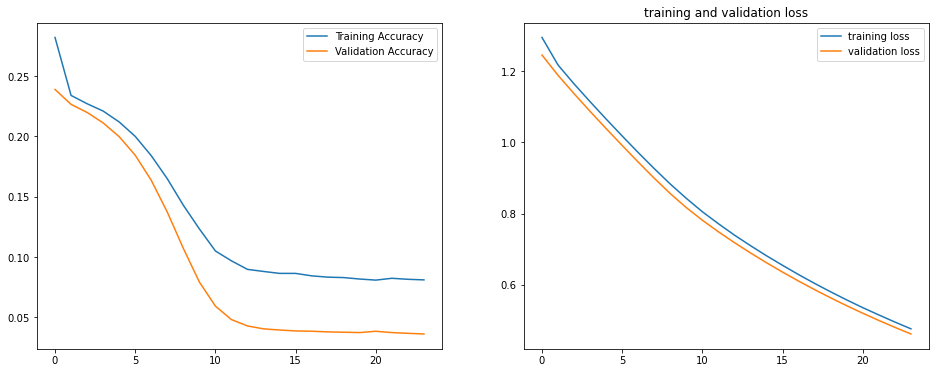

In [169]:
plot_model(histroy,epochs)

In [170]:
_50_days_ = data_training.tail(50)
data_training.tail(50)

,Date,Open,High,Low,Close,Adj Close,Volume
7064,2014-03-20,39.250000,40.650002,39.240002,40.330002,34.769726,59269800
7065,2014-03-21,40.720001,40.939999,40.009998,40.160000,34.623150,80721800
7066,2014-03-24,40.340000,40.639999,39.860001,40.500000,34.916294,46098400
7067,2014-03-25,40.660000,40.990002,39.959999,40.340000,34.778351,43193100
7068,2014-03-26,40.480000,40.709999,39.599998,39.790001,34.304173,41977500
7069,2014-03-27,39.740002,39.970001,39.340000,39.360001,33.933460,35369200
7070,2014-03-28,39.790001,40.639999,39.680000,40.299999,34.743858,43472700
7071,2014-03-31,40.430000,41.500000,40.400002,40.990002,35.338726,46886300
7072,2014-04-01,41.150002,41.590000,41.070000,41.419998,35.709446,32605000
7073,2014-04-02,41.439999,41.660000,41.169998,41.349998,35.649097,28666700


In [171]:
data_testing.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9082,2022-03-24,299.140015,304.200012,298.320007,304.100006,304.100006,24484500
9083,2022-03-25,305.230011,305.500000,299.290009,303.679993,303.679993,22550600
9084,2022-03-28,304.329987,310.799988,304.329987,310.700012,310.700012,29578200
9085,2022-03-29,313.910004,315.820007,309.049988,315.410004,315.410004,30376600
9086,2022-03-29,313.910004,315.820007,309.049988,315.410004,315.410004,30393403


In [172]:
df1 = _50_days_.append(data_testing, ignore_index= True)
df1 = df1.drop(['Date','Volume'], axis = 1)
df1.head()

,Open,High,Low,Close,Adj Close
0,39.250000,40.650002,39.240002,40.330002,34.769726
1,40.720001,40.939999,40.009998,40.160000,34.623150
2,40.340000,40.639999,39.860001,40.500000,34.916294
3,40.660000,40.990002,39.959999,40.340000,34.778351
4,40.480000,40.709999,39.599998,39.790001,34.304173


In [173]:
inputs = scaler.fit_transform(df1)
inputs

array([[8.18009306e-04, 4.18923671e-03, 2.40378006e-03, 4.17694809e-03,
        3.54652920e-03],
       [5.62790730e-03, 5.12374621e-03, 4.93924703e-03, 3.61782292e-03,
        3.07175404e-03],
       [4.38452988e-03, 4.15700225e-03, 4.44533221e-03, 4.73606011e-03,
        4.02127844e-03],
       ...,
       [8.68169594e-01, 8.74742127e-01, 8.75300394e-01, 8.93405773e-01,
        8.97313885e-01],
       [8.99515766e-01, 8.90919037e-01, 8.90842562e-01, 9.08896621e-01,
        9.12570047e-01],
       [8.99515766e-01, 8.90919037e-01, 8.90842562e-01, 9.08896621e-01,
        9.12570047e-01]])

In [174]:
inputs.shape

(2023, 5)

In [175]:
x_test = []
y_test = []

In [176]:
for i in range(50, inputs.shape[0]):
    x_test.append(inputs[i-50:i,1:])
    y_test.append(inputs[i, 0])

In [177]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape

(1973, 50, 4)

In [178]:
scaler.scale_

array([0.00327204, 0.00322248, 0.00329283, 0.00328893, 0.00323911])

In [179]:
scale_factor = 1/0.00327204
scale_factor

305.61973570005256

In [180]:
y_pred = reg.predict(x_test)

In [181]:
y_test = y_test*scale_factor
y_pred = y_pred*scale_factor

In [189]:
print("""actual \t\t\t  predicted""")
for x, y in zip(y_test,y_pred):
    print(x, y, sep='\t\t')

actual 			  predicted
1.9499993455429439		[2.3897853]
1.5999966424991674		[2.391623]
1.2099979733895625		[2.393712]
1.5899986509818642		[2.395485]
2.4799978958710773		[2.3973315]
2.389996972231448		[2.4002712]
2.029997277669511		[2.4044847]
1.9299983625125787		[2.4093328]
1.8099994643244155		[2.4138412]
2.0999962182796326		[2.4169755]
2.0399992691834217		[2.4190602]
2.289999057073658		[2.4210331]
2.609998785573151		[2.4233832]
2.569997819511564		[2.4264913]
2.449998921323409		[2.4304335]
2.729997683761306		[2.4351976]
2.8299995989157107		[2.4411025]
2.699998709213637		[2.4477549]
2.9299975140734915		[2.4547648]
2.609998785573151		[2.4613593]
3.1699953104498095		[2.4676273]
2.859998573463379		[2.473238]
2.729997683761306		[2.4780037]
2.9099975310422694		[2.4818246]
2.7499976667925274		[2.4846277]
2.8699965649806907		[2.4867897]
2.9799974716515423		[2.4883757]
2.3699969892002257		[2.4891846]
2.699998709213637		[2.4888875]
3.2199982680253156		[2.4881923]
3.3299991746961672		[2.4882846]
3.

In [183]:
y_pred.shape

(1973, 1)

In [184]:
SROCC,p = spearmanr(y_test,y_pred)
print("Spearman cor coef",SROCC)
KROCC,p = kendalltau(y_test,y_pred)
print("kendaltau cor coef",KROCC)
PLCC,p = pearsonr(y_test,y_pred[:,0])
print("pearson cor coef",PLCC)

Spearman cor coef 0.9975011660188601
kendaltau cor coef 0.9598869690100041
pearson cor coef 0.9909236137073407


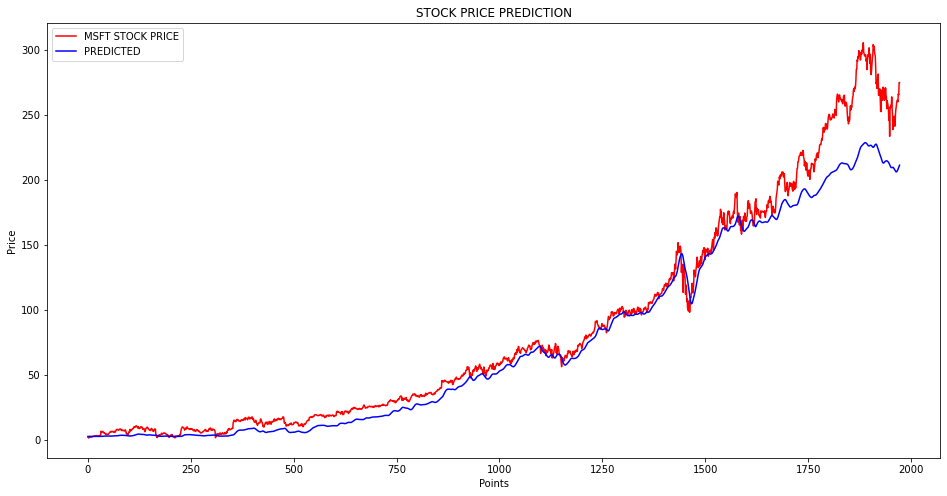

In [185]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = "red", label= "MSFT STOCK PRICE")
plt.plot(y_pred, color = "blue", label = "PREDICTED")
plt.title("STOCK PRICE PREDICTION")
plt.ylabel("Price")
plt.xlabel("Points")
plt.legend()
plt.show()

In [186]:
from tensorflow.keras.models import load_model

In [187]:
reg.save("MSFTGRU_Model.h5",save_format = 'h5')